<a href="https://colab.research.google.com/github/caiyu-yang/Bigdata/blob/main/0518.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
install.packages("SportsAnalytics")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [43]:
library(SportsAnalytics)
library(ggplot2)

In [45]:
NBA1718<- fetch_NBAPlayerStatistics("17-18")

In [73]:
str(NBA1718)

'data.frame':	540 obs. of  25 variables:
 $ League             : Factor w/ 1 level "NBA": 1 1 1 1 1 1 1 1 1 1 ...
 $ Name               : chr  "Alex Abrines" "Quincy Acy" "Steven Adams" "Bam Adebayo" ...
 $ Team               : Factor w/ 33 levels "ATL","BOS","BRO",..: 24 3 24 17 25 19 30 3 2 21 ...
 $ Position           : Factor w/ 5 levels "C","PF","PG",..: 5 4 1 2 5 1 2 1 5 5 ...
 $ GamesPlayed        : int  74 70 76 69 52 21 75 72 11 22 ...
 $ TotalMinutesPlayed : int  1134 1361 2486 1369 680 51 2512 1437 106 279 ...
 $ FieldGoalsMade     : int  115 130 448 174 65 5 687 234 6 44 ...
 $ FieldGoalsAttempted: int  291 365 712 340 162 15 1347 397 22 89 ...
 $ ThreesMade         : int  84 102 0 0 27 0 27 5 0 4 ...
 $ ThreesAttempted    : int  221 292 2 7 70 0 92 15 11 12 ...
 $ FreeThrowsMade     : int  39 49 160 129 22 2 334 114 7 11 ...
 $ FreeThrowsAttempted: int  46 60 286 179 26 6 399 147 9 21 ...
 $ OffensiveRebounds  : int  26 40 384 119 4 3 245 143 4 18 ...
 $ TotalRebounds     

`geom_smooth()` using formula 'y ~ x'



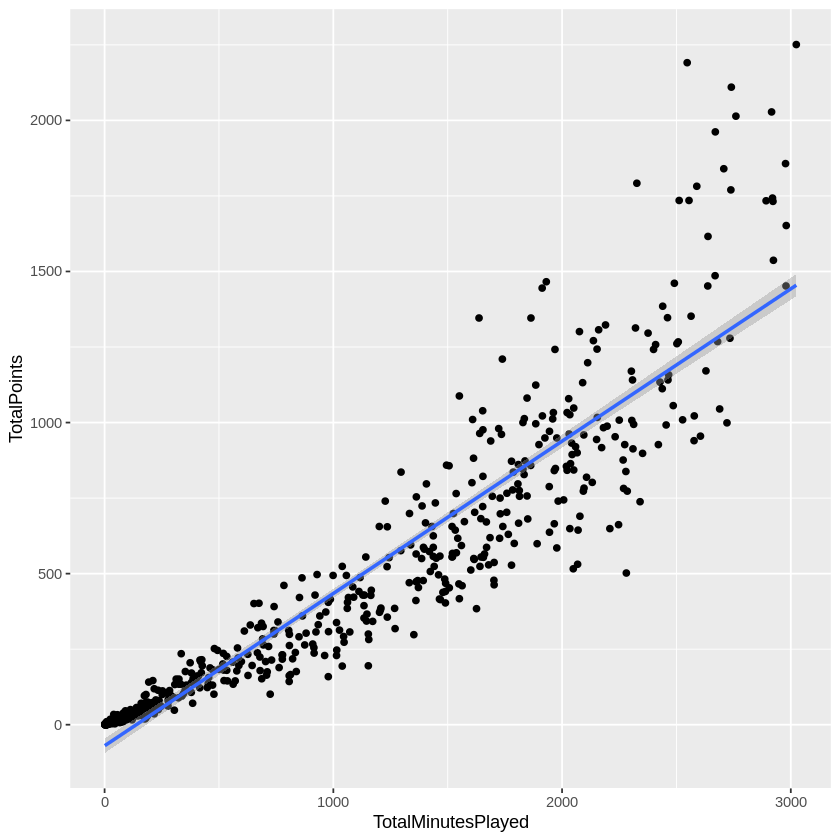

In [46]:
ggplot(NBA1718, aes(x=TotalMinutesPlayed, y= TotalPoints))+ geom_point()+geom_smooth(method = "glm")

`geom_smooth()` using formula 'y ~ x'



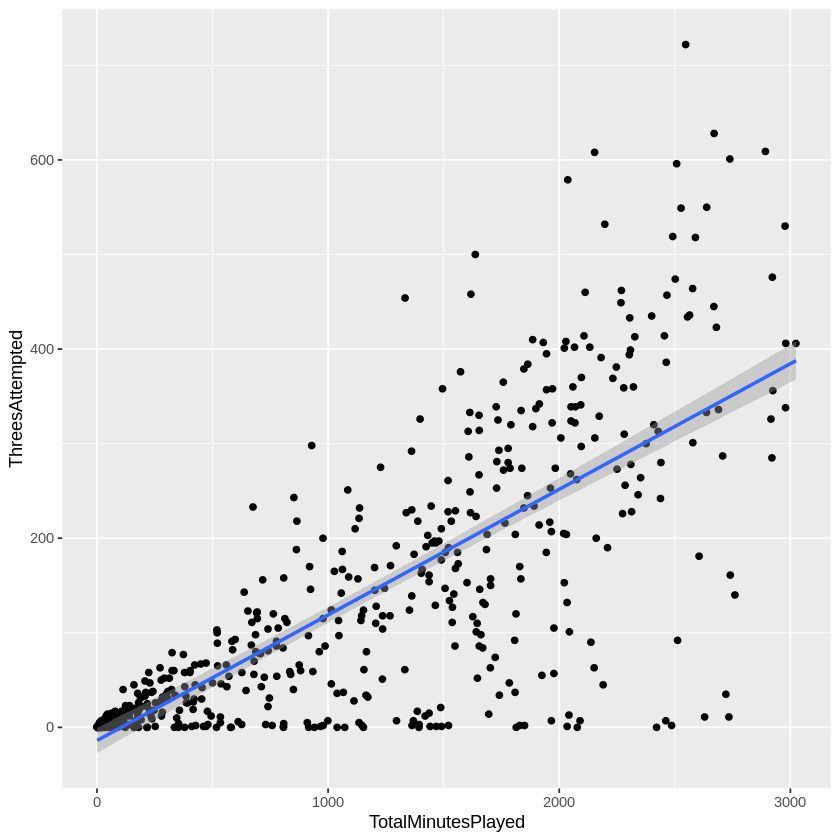

In [75]:
ggplot(NBA1718, aes(x=TotalMinutesPlayed, y= ThreesAttempted))+ geom_point()+geom_smooth(method = "glm")

In [47]:
lm(TotalPoints~TotalMinutesPlayed, data =NBA1718)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1718)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -69.7978              0.5041  


In [74]:
lm(ThreesAttempted~TotalRebounds, data =NBA1718)


Call:
lm(formula = ThreesAttempted ~ TotalRebounds, data = NBA1718)

Coefficients:
  (Intercept)  TotalRebounds  
      74.4841         0.2907  


In [49]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
    data =NBA1718)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1718)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           29.02535             -0.01681              1.31181  
         PositionPF           PositionPG           PositionSF  
          -29.81577            -57.56647            -39.12716  
         PositionSG  
          -58.55942  

Degrees of Freedom: 538 Total (i.e. Null);  532 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    117300000 
Residual Deviance: 1963000 	AIC: 5966

In [12]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [13]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [14]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank,
              data = mydata, family = "binomial")

In [15]:
sum <- summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [17]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
library(rpart)

In [54]:
DT <- rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1718)

In [56]:
DT

n=539 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 539 398 SG (0.14 0.21 0.2 0.19 0.26)  
    2) Blocks>=36.5 108  68 C (0.37 0.29 0.037 0.23 0.074)  
      4) ThreesMade< 6 35   8 C (0.77 0.17 0 0.057 0) *
      5) ThreesMade>=6 73  48 PF (0.18 0.34 0.055 0.32 0.11)  
       10) Assists< 159.5 40  19 PF (0.12 0.53 0 0.33 0.025)  
         20) Steals< 64 33  13 PF (0.15 0.61 0 0.21 0.03) *
         21) Steals>=64 7   1 SF (0 0.14 0 0.86 0) *
       11) Assists>=159.5 33  23 SF (0.24 0.12 0.12 0.3 0.21)  
         22) Blocks>=60.5 15   7 C (0.53 0.13 0.067 0.2 0.067) *
         23) Blocks< 60.5 18  11 SF (0 0.11 0.17 0.39 0.33) *
    3) Blocks< 36.5 431 298 SG (0.086 0.19 0.24 0.18 0.31)  
      6) Assists< 151.5 337 238 SG (0.11 0.23 0.16 0.21 0.29)  
       12) ThreesMade< 2.5 113  79 PF (0.27 0.3 0.13 0.13 0.17)  
         24) Blocks>=1.5 49  24 C (0.51 0.35 0.041 0.041 0.061) *
         25) Blocks< 1.5 64  

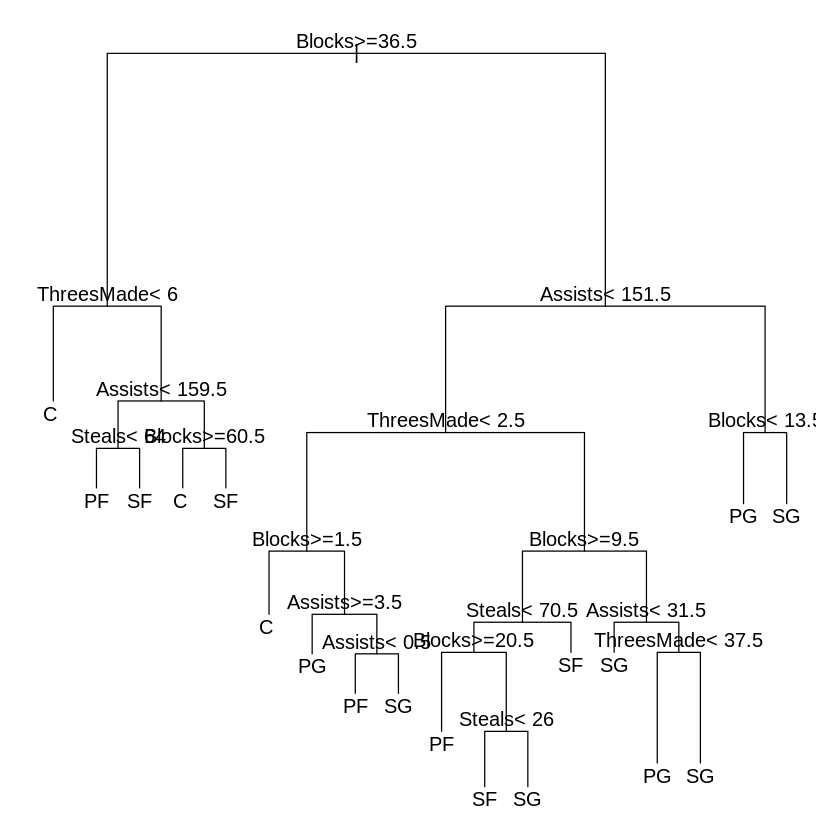

In [57]:
par(mfrow=c(1,1), mar = rep(1,4))
plot(DT)
text(DT, use.n=F, all=F, cex=1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



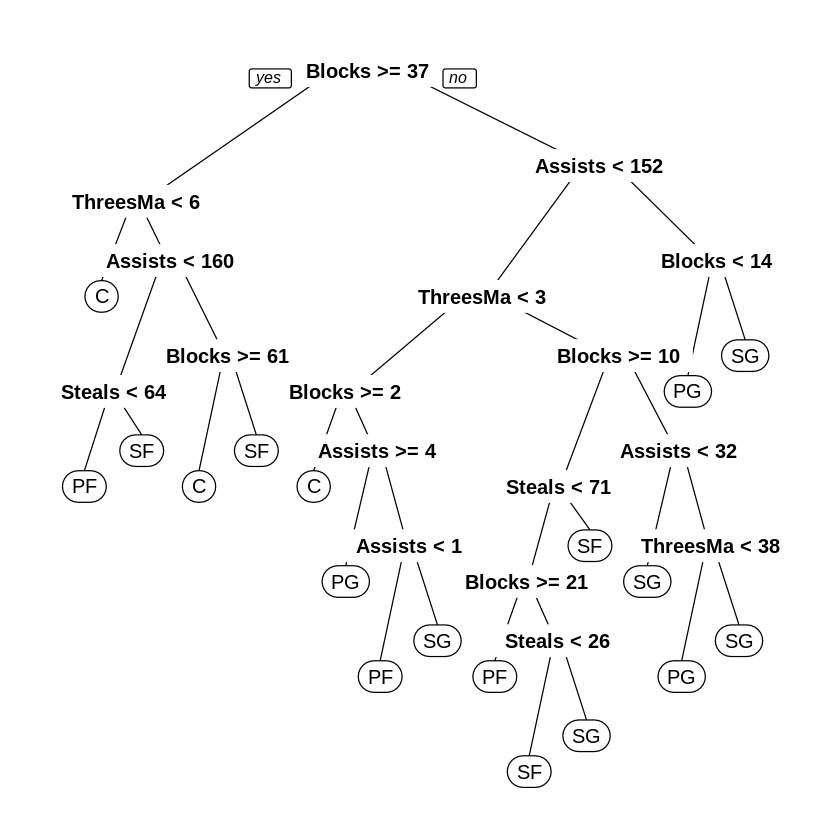

In [58]:
install.packages("rpart.plot")
library(rpart.plot)
prp(DT)

In [28]:
install.packages("arules")
library(arules)
install.packages("datasets")
library(datasets)

data(Groceries)
Groceries@data@Dim

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


[1]  169 9835

In [59]:
rules <- apriori(Groceries,
                parameter = list(supp = 0.001, conf = 0.8))
                control = list(verbose=F)
options(digit=2)
inspect(rules[1:5])

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [410 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                        rhs            support     confidence
[1] {liquor,red/blush wine} => {bottled beer} 0.001931876 0.9047619 
[2] {curd,cereals}          => {whole milk}   0.001016777 0.9090909 
[3] {yogurt,cereals}        => {whole milk}   0.001728521 0.8095238 
[4] {b

In [60]:
rules <- sort(rules, by="confidence", decreasing= TRUE)
inspect(rules[1:5])

    lhs                     rhs              support confidence    coverage     lift count
[1] {rice,                                                                                
     sugar}              => {whole milk} 0.001220132          1 0.001220132 3.913649    12
[2] {canned fish,                                                                         
     hygiene articles}   => {whole milk} 0.001118454          1 0.001118454 3.913649    11
[3] {root vegetables,                                                                     
     butter,                                                                              
     rice}               => {whole milk} 0.001016777          1 0.001016777 3.913649    10
[4] {root vegetables,                                                                     
     whipped/sour cream,                                                                  
     flour}              => {whole milk} 0.001728521          1 0.001728521 3.913649    17

In [61]:
rulesR <- apriori(data=Groceries, parameter=list(supp=0.001,conf=0.08),
          appearance = list(default="lhs",rhs="whole milk"),
          control = list(verbose=F))
rulesR <- sort(rulesR, decreasing=TRUE,by="confidence")
inspect(rulesR[1:5]) 

    lhs                     rhs              support confidence    coverage     lift count
[1] {rice,                                                                                
     sugar}              => {whole milk} 0.001220132          1 0.001220132 3.913649    12
[2] {canned fish,                                                                         
     hygiene articles}   => {whole milk} 0.001118454          1 0.001118454 3.913649    11
[3] {root vegetables,                                                                     
     butter,                                                                              
     rice}               => {whole milk} 0.001016777          1 0.001016777 3.913649    10
[4] {root vegetables,                                                                     
     whipped/sour cream,                                                                  
     flour}              => {whole milk} 0.001728521          1 0.001728521 3.913649    17

In [32]:
rulesR <- apriori(data=Groceries, parameter=list(supp=0.001,conf=0.08),
          appearance = list(default="lhs",rhs="bottled beer"),
          control = list(verbose=F))
rulesR <-sort(rulesR, decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                        rhs            support     confidence
[1] {liquor,red/blush wine} => {bottled beer} 0.001931876 0.9047619 
[2] {soda,liquor}           => {bottled beer} 0.001220132 0.5714286 
[3] {liquor}                => {bottled beer} 0.004677173 0.4220183 
[4] {herbs,bottled water}   => {bottled beer} 0.001220132 0.4000000 
[5] {whole milk,soups}      => {bottled beer} 0.001118454 0.3793103 
    coverage    lift      count
[1] 0.002135231 11.235269 19   
[2] 0.002135231  7.095960 12   
[3] 0.011082867  5.240594 46   
[4] 0.003050330  4.967172 12   
[5] 0.002948653  4.710249 11   


In [71]:
rulesR <- apriori(data=Groceries, parameter=list(supp=0.001,conf=0.08),
          appearance = list(default="lhs",rhs="soda"),
          control = list(verbose=F))
rulesR <-sort(rulesR, decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                                             rhs    support    
[1] {coffee,misc. beverages}                     => {soda} 0.001016777
[2] {yogurt,rolls/buns,bottled water,newspapers} => {soda} 0.001016777
[3] {sausage,bottled water,bottled beer}         => {soda} 0.001118454
[4] {sausage,white bread,shopping bags}          => {soda} 0.001016777
[5] {rolls/buns,bottled water,chocolate}         => {soda} 0.001321810
    confidence coverage    lift     count
[1] 0.7692308  0.001321810 4.411303 10   
[2] 0.7692308  0.001321810 4.411303 10   
[3] 0.7333333  0.001525165 4.205442 11   
[4] 0.6666667  0.001525165 3.823129 10   
[5] 0.6500000  0.002033554 3.727551 13   


In [40]:
rulesL <- apriori(data=Groceries, parameter=list(supp=0.001, conf= 0.15, minlen=2),
          appearance = list(default="rhs",lhs="whole milk"),
          control = list (verbose= F))
rulesL <- sort(rulesL, decreasing = TRUE,by="confidence")
inspect(rulesL[1:5])

    lhs             rhs                support    confidence coverage lift    
[1] {whole milk} => {other vegetables} 0.07483477 0.2928770  0.255516 1.513634
[2] {whole milk} => {rolls/buns}       0.05663447 0.2216474  0.255516 1.205032
[3] {whole milk} => {yogurt}           0.05602440 0.2192598  0.255516 1.571735
[4] {whole milk} => {root vegetables}  0.04890696 0.1914047  0.255516 1.756031
[5] {whole milk} => {tropical fruit}   0.04229792 0.1655392  0.255516 1.577595
    count
[1] 736  
[2] 557  
[3] 551  
[4] 481  
[5] 416  


In [41]:
rulesL <- apriori(data=Groceries, parameter=list(supp=0.001, conf= 0.15, minlen=2),
          appearance = list(default="rhs",lhs="bottled beer"),
          control = list (verbose= F))
rulesL <- sort(rulesL, decreasing = TRUE,by="confidence")
inspect(rulesL[1:5])

    lhs               rhs                support    confidence coverage  
[1] {bottled beer} => {whole milk}       0.02043721 0.2537879  0.08052872
[2] {bottled beer} => {soda}             0.01698017 0.2108586  0.08052872
[3] {bottled beer} => {other vegetables} 0.01616675 0.2007576  0.08052872
[4] {bottled beer} => {bottled water}    0.01576004 0.1957071  0.08052872
[5] {bottled beer} => {rolls/buns}       0.01362481 0.1691919  0.08052872
    lift      count
[1] 0.9932367 201  
[2] 1.2092094 167  
[3] 1.0375464 159  
[4] 1.7707259 155  
[5] 0.9198466 134  


In [72]:
rulesL <- apriori(data=Groceries, parameter=list(supp=0.001, conf= 0.15, minlen=2),
          appearance = list(default="rhs",lhs="domestic eggs"),
          control = list (verbose= F))
rulesL <- sort(rulesL, decreasing = TRUE,by="confidence")
inspect(rulesL[1:5])

    lhs                rhs                support    confidence coverage  
[1] {domestic eggs} => {whole milk}       0.02999492 0.4727564  0.06344687
[2] {domestic eggs} => {other vegetables} 0.02226741 0.3509615  0.06344687
[3] {domestic eggs} => {rolls/buns}       0.01565836 0.2467949  0.06344687
[4] {domestic eggs} => {root vegetables}  0.01433655 0.2259615  0.06344687
[5] {domestic eggs} => {yogurt}           0.01433655 0.2259615  0.06344687
    lift     count
[1] 1.850203 295  
[2] 1.813824 219  
[3] 1.341751 154  
[4] 2.073071 141  
[5] 1.619775 141  
